In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import dlib
import sys
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

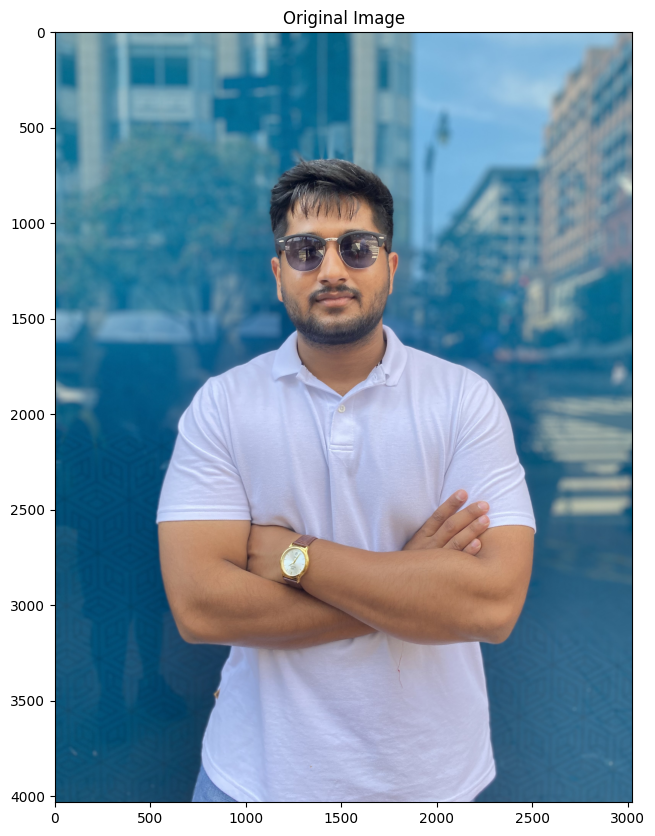

In [3]:
image = cv2.imread('/content/yash.jpg')
imshow("Original Image", image)


In [5]:
image.shape

(4032, 3024, 3)

In [6]:
# lets create a mask np.zeros with the size same as width and
# height of the original image
mask = np.zeros(image.shape[:2], dtype = np.uint8)

In [7]:
# lets initialize the arrays for bgmodel and fgmodel

bgmodel = np.zeros((1,65), np.float64)
fgmodel = np.zeros((1,65), np.float64)

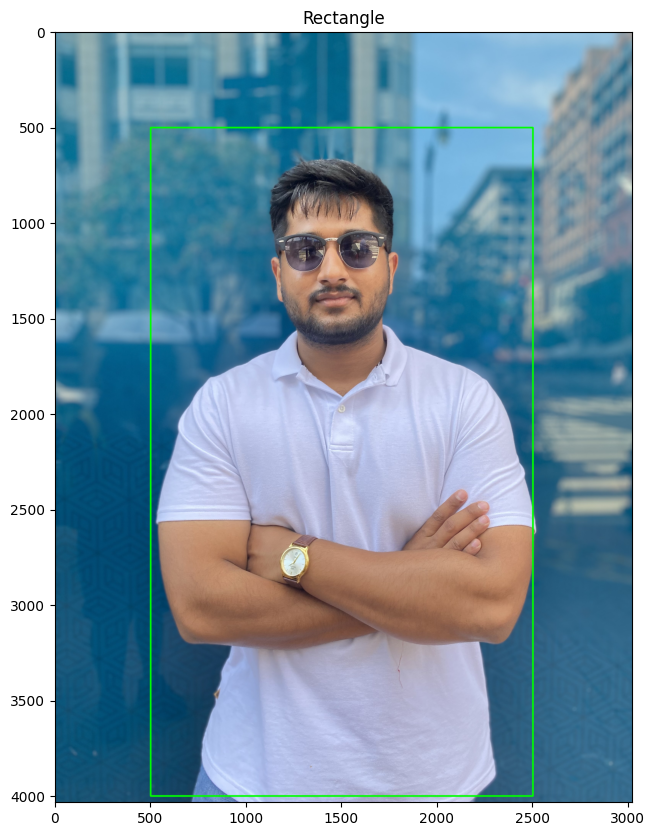

In [9]:
# lets create a reactangle around our ROI

x1, y1, x2, y2 = 500, 500, 2500, 4000
start = (x1,y1)
end = (x2,y2)

rect = (x1, y1, x2-x1, y2-y1)

# show rectangle
cv2.rectangle(image, start, end, (0,255,0), 8)
imshow("Rectangle", image)

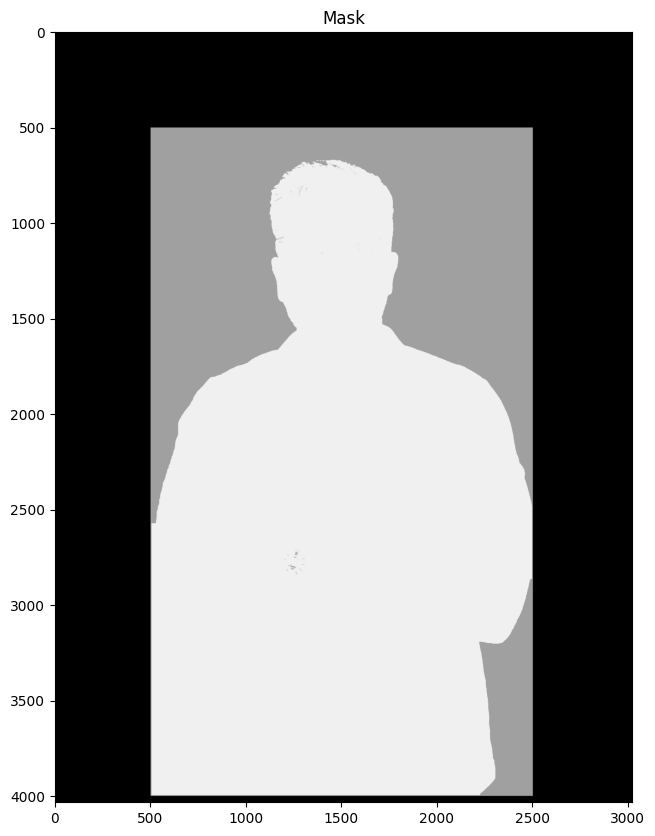

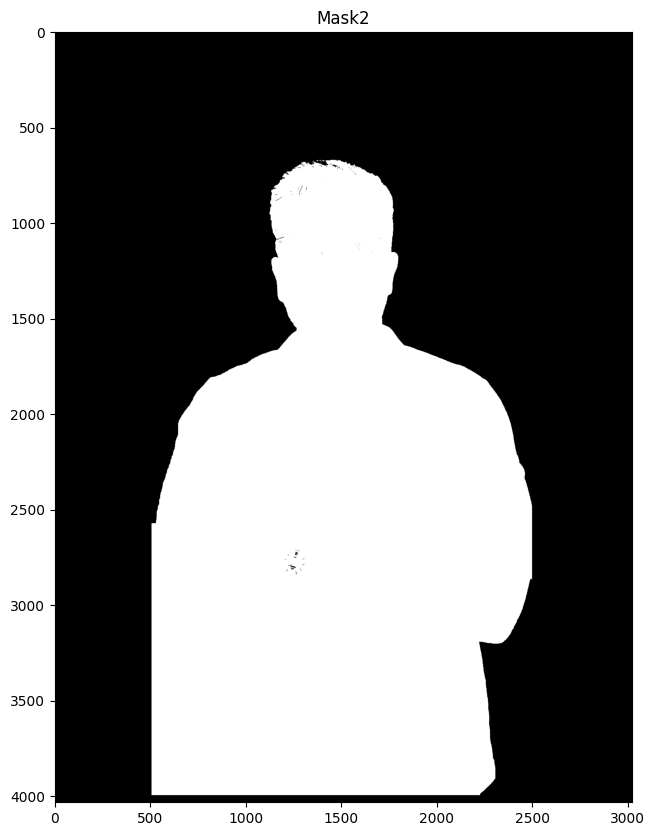

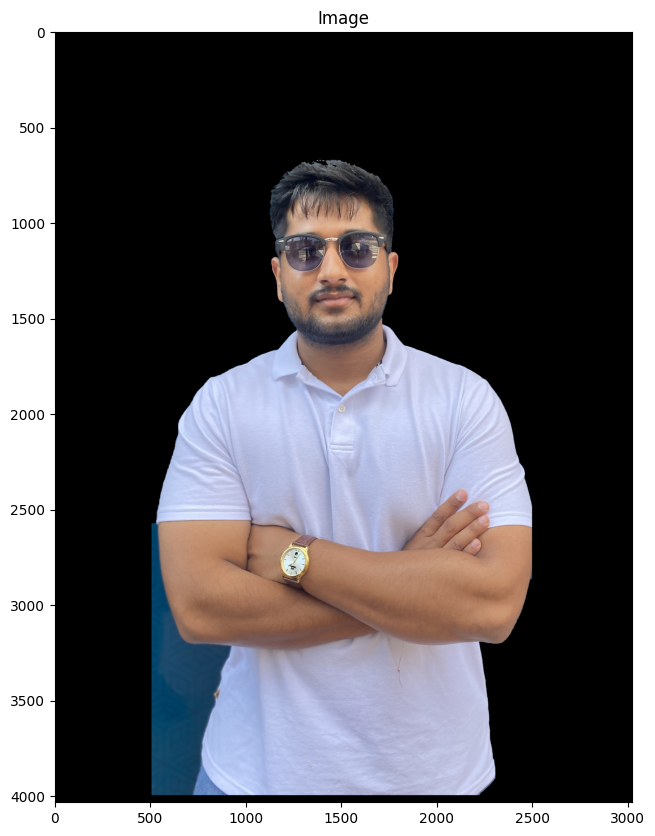

In [12]:
# Let the algorithm run for 5 iterations. Mode should be cv.GC_INIT_WITH_RECT since we are using rectangle.
# Grabcut modifies the mask image.
# In the new mask image, pixels will be marked with four flags denoting background/foreground as specified above.
# So we modify the mask such that all 0-pixels and 2-pixels are put to 0 (i.e. background) & all 1-pixels and 3-pixels are put to 1(i.e. foreground pixels).
# Now our final mask is ready. Just multiply it with input image to get the segmented image.
cv2.grabCut(image, mask, rect, bgmodel, fgmodel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
image = image * mask2[:,:,np.newaxis]

imshow("Mask", mask * 80)
imshow("Mask2", mask2 * 255)
imshow("Image", image)